## Import modules

In [1]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path
%matplotlib inline
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims

## Specify experiment directory

In [2]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/'
protein="TNR" #TNR,Agg,WFA,HABP

## Make results dict and load aligned images from matlab GUI

In [23]:
#make synapse results dictionary

spots={"filename":[]}

path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    #if "_analyse" in str(filelist[i]):        
        if ("samecell" in str(filelist[i]))==True:
            if ("output_classification" in str(filelist[i]))==True:
                if (protein in str(filelist[i]))==True:
                    if ("backup" in str(filelist[i]))==False:
                        if filelist[i].endswith(".txt"): 
                            #if str(filelist[i][:-12]) not in str(spots["filename"]):
                                spots["filename"].append(filelist[i])


synapses_results={"spots classification filename":[],
                "sted spot":[],
                "vglut spot":[],
                "dio spot":[],
                "sted spot aligned":[],
                "vglut spot aligned":[],
                "dio spot aligned":[],
                 "sted spot aligned no back":[],
                "vglut spot aligned no back":[],
                "dio spot aligned no back":[],
                "Exp name":[],
                "Cell number":[],
                "unique id (expname_cell number)":[],
                "classification":[],
                  "mean ecm intensity sted":[],
                  "ecm intensity sted, bg subtracted":[],
                  "mean ecm intensity sted noback":[],
                  "ecm intensity sted noback bg subtracted":[],
                  "mean vglut intensity sted":[],
                  "vglut intensity sted, bg subtracted":[],
                  "mean vglut intensity sted noback":[],
                  "vglut intensity sted noback bg subtracted":[],
                  "mean vglut size (sum of pixels)":[],
                  "mean vglut size (sum of pixels) from noback":[],
                  "exp condition":[]}
                  
for spot in range(0,len(spots["filename"])):
    print(spots["filename"][spot])
    firstpart='/'.join(spots["filename"][spot].split("/")[:-1])
    lastpart=spots["filename"][spot].split("classification")[-1]
    synapses_results["spots classification filename"].append(spots["filename"][spot])
    file2read=firstpart+'/output_sted_'+lastpart
    synapses_results["sted spot"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_homer_'+lastpart
    synapses_results["vglut spot"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_dio_'+lastpart
    synapses_results["dio spot"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_sted_aligned_'+lastpart
    synapses_results["sted spot aligned"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_homer_aligned_'+lastpart
    synapses_results["vglut spot aligned"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_dio_aligned_'+lastpart
    synapses_results["dio spot aligned"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_sted_aligned_noback_'+lastpart
    synapses_results["sted spot aligned no back"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_homer_aligned_noback_'+lastpart
    synapses_results["vglut spot aligned no back"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    file2read=firstpart+'/output_dio_aligned_noback_'+lastpart
    synapses_results["dio spot aligned no back"].append(np.asarray(np.loadtxt(file2read,delimiter=',')))
    
    synapses_results["Exp name"].append(file2read.split("2019")[-1][0:4])
    synapses_results["Cell number"].append(lastpart[-9:-4])
    synapses_results["unique id (expname_cell number)"].append(file2read.split("2019")[-1][0:4]+'_'+lastpart[-9:-4])
    synapses_results["classification"].append(np.loadtxt(spots["filename"][spot]))
    synapses_results["exp condition"].append(synapses_results["spots classification filename"][spot].split("TIFs")[-1].split('/')[1])
    
    synapses_results["mean ecm intensity sted"].append(np.nan)
    synapses_results["ecm intensity sted, bg subtracted"].append(np.nan)
    synapses_results["mean ecm intensity sted noback"].append(np.nan)
    synapses_results["ecm intensity sted noback bg subtracted"].append(np.nan)
    synapses_results["mean vglut intensity sted"].append(np.nan)
    synapses_results["vglut intensity sted, bg subtracted"].append(np.nan)
    synapses_results["mean vglut intensity sted noback"].append(np.nan)
    synapses_results["vglut intensity sted noback bg subtracted"].append(np.nan)
    synapses_results["mean vglut size (sum of pixels)"].append(np.nan)
    synapses_results["mean vglut size (sum of pixels) from noback"].append(np.nan)

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification2_11_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification3_12_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification8_17_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification10_20_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification136_36_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification139_3_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification140_40_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification142_5_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification300_36_03_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification302_38_03_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification303_39_03_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification306_41_03_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonl

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification444_22_04_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification445_23_04_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification447_25_04_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_DMSO/output_classification449_27_04_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonl

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification45_12_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification46_13_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification51_18_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification62_2_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bi

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification212_3_05_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification213_4_05_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification227_18_05_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr_Bic/output_classification232_22_05_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/12hr

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification5_3_01_06.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification8_6_01_06.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification9_7_01_06.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification17_1_01_06.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIF

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification121_8_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification122_9_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification136_22_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification151_3_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification380_15_01_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification382_1_01_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification386_5_01_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_try2/TIFs_analyse_samecellonly/Unblocked_Control/output_classification387_6_01_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190225_TNR647_VGlut580_DiO/Images_axonsdendrites_fromsamecell_

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification44_7_05_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification46_9_05_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification47_10_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification50_13_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification54_17_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification55_1_05_02.txt
/Volumes/ukps

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification223_7_06_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification224_8_06_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification226_11_06_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification232_17_06_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification236_22_06_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_Bic/output_classification245_8_06_01.txt
/Volume

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification58_15_01_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification61_18_01_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification62_19_01_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification63_20_01_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification65_22_01_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification194_17_02_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification195_18_02_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification196_19_02_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification211_34_02_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification213_36_02_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Co

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification314_3_02_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification316_41_02_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification317_42_02_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification319_44_02_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Control/output_classification320_45_02_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/Unblocked_Con

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification39_14_03_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification43_18_03_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification45_21_03_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification48_24_03_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification49_25_03_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification58_34_03_02.txt
/Vol

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification191_11_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification192_12_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification195_16_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification199_6_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification202_10_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190302_TNR647_Vglut580_DiO/TIFs_analyse_samecell/12hrs_DMSO/output_classification206_14_04_02.txt

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification52_27_01_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification54_29_01_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification56_31_01_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification59_34_01_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification60_35_01_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblock

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification156_66_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification157_67_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification160_6_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification161_7_01_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification165_2_01_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblo

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification306_31_01_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification307_32_01_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification308_33_01_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification310_35_01_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Unblocked_Control/TIF_imp/output_classification316_42_01_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/Un

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification31_7_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification32_8_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification36_12_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification37_13_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification41_17_03_01.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification45_21_03_0

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification161_21_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification163_23_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification167_27_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification170_30_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification175_35_03_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification178

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification379_6_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification383_10_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification384_11_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification387_14_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification389_16_04_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_DMSO/TIF_imp/output_classification392_

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification42_27_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification47_31_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification49_33_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification53_37_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification56_3_05_02.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification64_6_05_02.txt


/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification158_9_05_03.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification161_12_05_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification164_15_05_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification166_2_05_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification168_4_05_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification173_9_05_04.

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification401_43_06_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification416_5_06_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification427_6_06_04.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification444_1_06_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification449_6_06_05.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190307_TNR647_VGlut580_DiO_analyse_samecell/12hr_Bic/TIF_imp/output_classification455_12_06_05.

<a id='loadingprocessinganalysing'></a> 
## Loading, processing and batch analyzing the images
**Let's start by loading a random image and looking at the ECM channel:**

## Spot analysis

In [24]:
for spotno in range(0,len(synapses_results["spots classification filename"])):
    synapses_results["mean ecm intensity sted"][spotno]=np.nanmean(synapses_results["sted spot aligned"][spotno])
    synapses_results["mean ecm intensity sted noback"][spotno]=np.nanmean(synapses_results["sted spot aligned no back"][spotno])
    synapses_results["mean vglut intensity sted"][spotno]=np.nanmean(synapses_results["vglut spot aligned"][spotno])
    synapses_results["mean vglut intensity sted noback"][spotno]=np.nanmean(synapses_results["vglut spot aligned no back"][spotno])
    synapses_results["mean vglut size (sum of pixels)"][spotno]=np.sum(synapses_results["vglut spot aligned"][spotno])
    synapses_results["mean vglut size (sum of pixels) from noback"][spotno]=np.sum(synapses_results["vglut spot aligned no back"][spotno])

    #bg subtraction
    ecm_around_spot_bgsub=np.array(deepcopy(synapses_results["sted spot aligned"][spotno]))
    bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
    ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
    ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0
    synapses_results["ecm intensity sted, bg subtracted"][spotno]=(ecm_around_spot_bgsub)
    
    ecm_around_spot_bgsub=np.array(deepcopy(synapses_results["sted spot aligned no back"][spotno]))
    bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
    ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
    ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0
    synapses_results["ecm intensity sted noback bg subtracted"][spotno]=(ecm_around_spot_bgsub)
    
    ecm_around_spot_bgsub=np.array(deepcopy(synapses_results["vglut spot aligned"][spotno]))
    bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
    ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
    ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0
    synapses_results["vglut intensity sted, bg subtracted"][spotno]=(ecm_around_spot_bgsub)
    
    ecm_around_spot_bgsub=np.array(deepcopy(synapses_results["vglut spot aligned no back"][spotno]))
    bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
    ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
    ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0
    synapses_results["vglut intensity sted noback bg subtracted"][spotno]=(ecm_around_spot_bgsub)

## Make average images

In [25]:
df=pd.DataFrame(synapses_results)

## Plot a random spot image

Text(0.5, 1.0, 'dio around synapse spot')

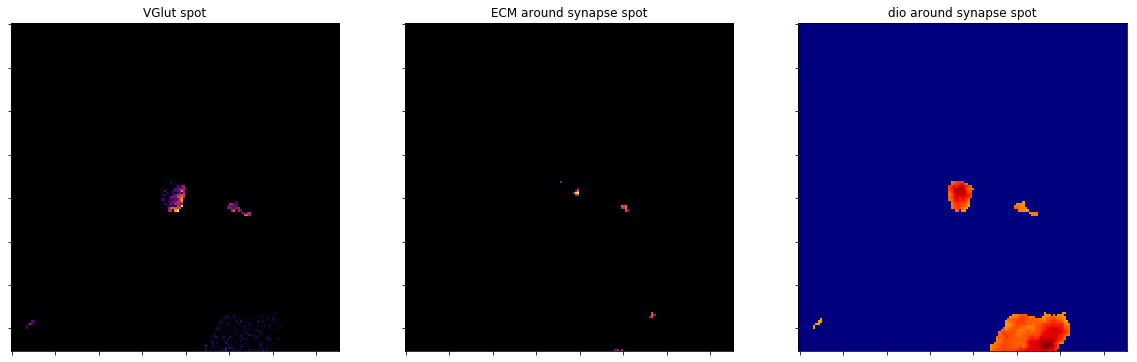

In [26]:
randomno=np.random.randint(1,len(df))
fig=plt.figure(figsize=(20,20))
fig.add_subplot(131)
plt.imshow(df["vglut spot aligned"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('VGlut spot')
fig.add_subplot(132)
plt.imshow(df["sted spot aligned"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('ECM around synapse spot')
fig.add_subplot(133)
plt.imshow(df["dio spot aligned"][randomno],cmap='jet')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('dio around synapse spot')

### Add radial average

In [27]:
## radial_average version 2 - define function
def radial_average(image):
    import numpy as np
    import scipy
    from scipy import ndimage
    import matplotlib.pyplot as plt

    f = image
    sx, sy = f.shape
    X, Y = np.ogrid[0:sx, 0:sy]


    r = np.hypot(X - sx/2, Y - sy/2)

    rbin = (20* r/r.max()).astype(np.int) ##30 rings --> r-
    radial_mean = ndimage.mean(f, labels=rbin, index=np.arange(1, rbin.max() +1))
    return radial_mean

##add radial average
df['radial_average_ecm']=''
df['radial_average_ecm_bgsubtracted']=''
df['radial_average_dio']=''
df['radial_average_vglut']=''
df['radial_average_vglut_bgsubtracted']=''
for i in range(0,len(df['radial_average_ecm_bgsubtracted'])):
    df['radial_average_ecm_bgsubtracted'][i]=radial_average(df["ecm intensity sted, bg subtracted"][i])
    df['radial_average_ecm'][i]=radial_average(df["sted spot aligned"][i])
    df['radial_average_vglut'][i]=radial_average(df["vglut spot aligned"][i])
    df['radial_average_vglut_bgsubtracted'][i]=radial_average(df["vglut intensity sted, bg subtracted"][i])
    df['radial_average_dio'][i]=radial_average(df["dio spot aligned"][i])

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning

### Add meaningful columns to the df

In [28]:
#make df, which also contains column names for plotting (drug, condition)
df['Time']='None'
df.loc[df['spots classification filename'].str.contains('12hr'), 'Time'] = '12hrs'
df.loc[df['spots classification filename'].str.contains('Ctrl'), 'Time'] = 'Unblocked Control'
df.loc[df['spots classification filename'].str.contains('Control'), 'Time'] = 'Unblocked Control'

df["Drug"]='None'
df.loc[df['spots classification filename'].str.contains('Bic'), 'Drug'] = 'Bic'
df.loc[df['spots classification filename'].str.contains('bic'), 'Drug'] = 'Bic'
df.loc[df['spots classification filename'].str.contains('DMSO'), 'Drug'] = 'DMSO'
df.loc[df['spots classification filename'].str.contains('Ctrl'), 'Drug'] = 'DMSO'
df.loc[df['spots classification filename'].str.contains('Control'), 'Drug'] = 'DMSO'

#nicely written treatment condition for plotting
df['Condition']='None'
df.loc[df['spots classification filename'].str.contains('12hr_Bic'), 'Condition'] = '12hr + Bic'
df.loc[df['spots classification filename'].str.contains('12hr_DMSO'), 'Condition'] = '12hr'
df.loc[df['spots classification filename'].str.contains('Control'), 'Condition'] = 'Unblocked Control'
df.loc[df['spots classification filename'].str.contains('12hrs_Bic'), 'Condition'] = '12hr + Bic'
df.loc[df['spots classification filename'].str.contains('12hrs_DMSO'), 'Condition'] = '12hr'

## Add means and divide by median

In [29]:
df["Exp name"].unique()

array(['0225', '0302', '0307'], dtype=object)

In [30]:
df["mean ecm intensity sted, bg subtracted"]=np.nan
df["mean vglut intensity sted, bg subtracted"]=np.nan
for i in range(0,len(df)):
    df["mean ecm intensity sted, bg subtracted"][i]=df["ecm intensity sted, bg subtracted"][i].mean()
    df["mean vglut intensity sted, bg subtracted"][i]=df["vglut intensity sted, bg subtracted"][i].mean()

    
expnam=[]
medtnr=[]
medvglut=[]   
for exp in df["Exp name"].unique():
    dfexp=df[df["Exp name"]==exp]
    med_tnr=dfexp["mean ecm intensity sted, bg subtracted"].median()
    med_vglut=dfexp["mean vglut intensity sted, bg subtracted"].median()
    print(exp+' - med tnr: '+str(med_tnr)+' - med vglut: '+str(med_vglut))
    expnam.append(exp)
    medtnr.append(med_tnr)
    medvglut.append(med_vglut)
df["ecm mean int norm2med"]=np.nan
df["vglut mean int norm2med"]=np.nan


/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0225 - med tnr: 0.07265037547943168 - med vglut: 1.080055683250208
0302 - med tnr: 0.1061154624645971 - med vglut: 0.6236793832649349
0307 - med tnr: 0.22207896580905692 - med vglut: 0.5101576644743427


In [31]:
for i in range(0,len(df)):
    if df["Exp name"][i]==expnam[0]:
        df["ecm mean int norm2med"][i]=df["mean ecm intensity sted, bg subtracted"][i]/medtnr[0]
        df["vglut mean int norm2med"][i]=df["mean vglut intensity sted, bg subtracted"][i]/medvglut[0]
    if df["Exp name"][i]==expnam[1]:
        df["ecm mean int norm2med"][i]=df["mean ecm intensity sted, bg subtracted"][i]/medtnr[1]
        df["vglut mean int norm2med"][i]=df["mean vglut intensity sted, bg subtracted"][i]/medvglut[1]
    if df["Exp name"][i]==expnam[2]:
        df["ecm mean int norm2med"][i]=df["mean ecm intensity sted, bg subtracted"][i]/medtnr[2]
        df["vglut mean int norm2med"][i]=df["mean vglut intensity sted, bg subtracted"][i]/medvglut[2]

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

## Calculate a ratio for each cell

In [32]:
dict_cellratios={"cell id":[],"Exp name":[],"time":[], "drug":[],"condition":[],
                 "axon mean int bg subtracted":[],"axon mean int bg subtracted norm2med":[],
                "dendrite mean int bg subtracted":[],
                "dendrite mean int bg subtracted norm2med":[],
                "mushroom mean int bg subtracted":[],
                "mushroom mean int bg subtracted norm2med":[],
                "flat mean int bg subtracted":[],
                "flat mean int bg subtracted norm2med":[],
                 "ratio axon to dendrite":[],
                 "ratio axon to dendrite norm2meds":[],
                 "ratio axon to mushroom":[],
                 "ratio axon to mushroom norm2meds":[],
                 "ratio axon to flat":[],
                 "ratio axon to flat norm2meds":[]
                }

for cellid in df["unique id (expname_cell number)"].unique():
    dfcell=df[df["unique id (expname_cell number)"]==cellid]
    dict_cellratios["cell id"].append(cellid)
    dict_cellratios["Exp name"].append(dfcell["Exp name"].unique()[0])
    dict_cellratios["time"].append(dfcell["Time"].unique()[0])
    dict_cellratios["drug"].append(dfcell["Drug"].unique()[0])
    dict_cellratios["condition"].append(dfcell["Condition"].unique()[0])
    
    axonmean=dfcell[dfcell["classification"]==3]["mean ecm intensity sted, bg subtracted"].mean()
    axonnorm2medmean=dfcell[dfcell["classification"]==3]["ecm mean int norm2med"].mean()
    dendritemean=dfcell[(dfcell["classification"]!=3)&(dfcell["classification"]!=4)]["mean ecm intensity sted, bg subtracted"].mean()
    dendritenorm2medmean=dfcell[(dfcell["classification"]!=3)&(dfcell["classification"]!=4)]["ecm mean int norm2med"].mean()
    mushroommean=dfcell[dfcell["classification"]==1]["mean ecm intensity sted, bg subtracted"].mean()
    mushroomnorm2medmean=dfcell[dfcell["classification"]==1]["ecm mean int norm2med"].mean()
    flatmean=dfcell[dfcell["classification"]==2]["mean ecm intensity sted, bg subtracted"].mean()
    flatnorm2medmean=dfcell[dfcell["classification"]==2]["ecm mean int norm2med"].mean()
    
    ratioaxdendrite=axonmean/dendritemean
    ratioaxdendritenorm2meds=axonnorm2medmean/dendritenorm2medmean
    ratioaxmush=axonmean/mushroommean
    ratioaxmushnorm2med=axonnorm2medmean/mushroomnorm2medmean
    ratioaxflat=axonmean/flatmean
    ratioaxflatnorm2med=axonnorm2medmean/flatnorm2medmean
    
    dict_cellratios["axon mean int bg subtracted"].append(axonmean)
    dict_cellratios["axon mean int bg subtracted norm2med"].append(axonnorm2medmean)

    dict_cellratios["dendrite mean int bg subtracted"].append(dendritemean)
    dict_cellratios["dendrite mean int bg subtracted norm2med"].append(dendritenorm2medmean)
    
    dict_cellratios["mushroom mean int bg subtracted"].append(mushroommean)
    dict_cellratios["mushroom mean int bg subtracted norm2med"].append(mushroomnorm2medmean)
    
    dict_cellratios["flat mean int bg subtracted"].append(flatmean)
    dict_cellratios["flat mean int bg subtracted norm2med"].append(flatnorm2medmean)
    
    dict_cellratios["ratio axon to dendrite"].append(ratioaxdendrite)
    dict_cellratios["ratio axon to dendrite norm2meds"].append(ratioaxdendritenorm2meds)
    dict_cellratios["ratio axon to mushroom"].append(ratioaxmush)
    dict_cellratios["ratio axon to mushroom norm2meds"].append(ratioaxmushnorm2med)
    dict_cellratios["ratio axon to flat"].append(ratioaxflat)
    dict_cellratios["ratio axon to flat norm2meds"].append(ratioaxflatnorm2med)
    

In [33]:
dfcells=pd.DataFrame(dict_cellratios)

## save the pickle

In [31]:
dfcells.to_pickle(expdir+'dfcells.pkl')

In [3]:
dfcells=pd.read_pickle(expdir+'dfcells.pkl')

In [23]:
dfcells["Exp name"].unique()

array(['0225', '0302', '0307'], dtype=object)

## Plot ratios

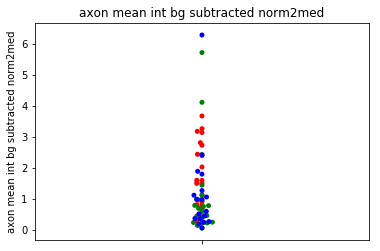

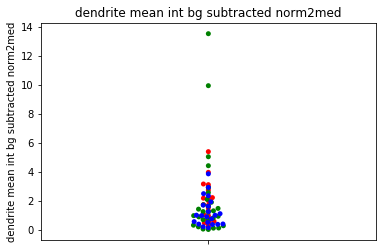

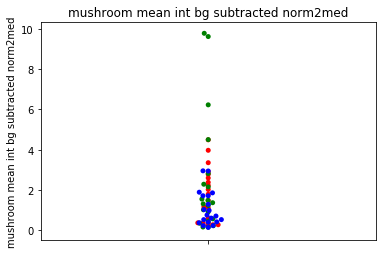

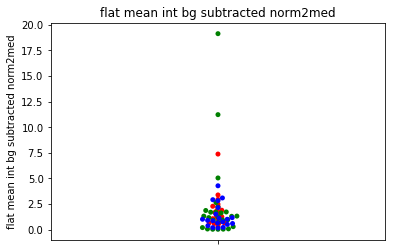

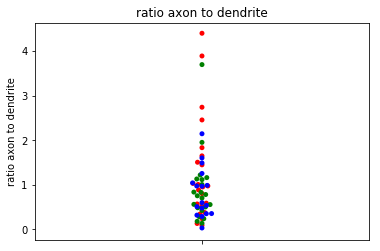

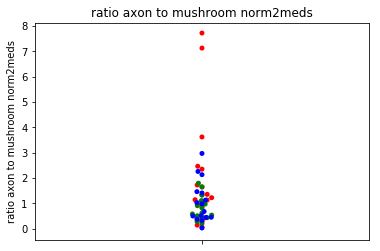

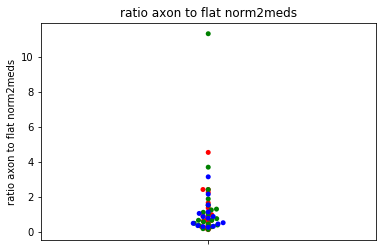

In [4]:
vari=["axon mean int bg subtracted norm2med",
      "dendrite mean int bg subtracted norm2med",
      "mushroom mean int bg subtracted norm2med",
      "flat mean int bg subtracted norm2med",
      "ratio axon to dendrite",
      "ratio axon to mushroom norm2meds",
      "ratio axon to flat norm2meds"
     ]

for vary in range(0,len(vari)):
    var=vari[vary]
    plt.figure()
    plt.title(var)
    i=-1
    colors=["red","green","blue"]
    for exp in dfcells["Exp name"].unique():
        #print(exp)
        dfexp=dfcells[dfcells["Exp name"]==exp]
        #print(dfexp[var].mean())
        i+=1

        #g=sns.scatterplot(y=var,x="drug",
        #                data=dfexp,color=colors[i])
        g=sns.swarmplot(y=var,
                        data=dfexp,color=colors[i])
        #plt.ylim([0,2])

In [55]:
dfplot=dfcells.dropna()
#dfplot=dfplot[dfplot["dendrite mean int bg subtracted norm2med"]<dfplot["dendrite mean int bg subtracted norm2med"].quantile(0.99)]


([<matplotlib.axis.XTick at 0x126905400>,
 <a list of 3 Text xticklabel objects>)

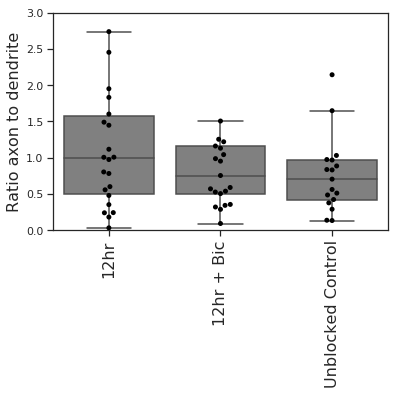

In [39]:
#sns.violinplot(x="condition",y="ratio axon to dendrite norm2meds",data=dfcells)
g=sns.swarmplot(x="condition",y="ratio axon to dendrite norm2meds",data=dfcells,color='black')
g=sns.boxplot(x="condition",y="ratio axon to dendrite norm2meds",data=dfcells,color='grey',showfliers=False)
plt.ylim([0,3])
plt.ylabel('Ratio axon to dendrite',fontsize=16)
plt.xlabel('')
plt.xticks(g.get_xticks(),fontsize=16,rotation=90)

In [56]:
for condition in dfplot["condition"].unique():
    print(condition+': '+str(len(dfplot[dfplot["condition"]==condition])))

12hr: 19
12hr + Bic: 14
Unblocked Control: 13


12hr
12hr + Bic
Unblocked Control


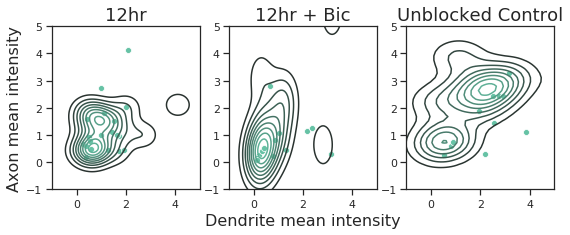

In [57]:
i=0
fig=plt.figure(figsize=(9,3))
for condition in dfplot["condition"].unique():
    print(condition)
    i+=1
    
    fig.add_subplot(1,3,i)
    plt.title(condition,fontsize=18)
    df2plot=dfplot[dfplot["condition"]==condition]
    sns.kdeplot(df2plot["axon mean int bg subtracted norm2med"],
                df2plot["dendrite mean int bg subtracted norm2med"])
    sns.scatterplot(y=df2plot["axon mean int bg subtracted norm2med"],
                x=df2plot["dendrite mean int bg subtracted norm2med"])
    plt.ylim([-1,5])
    plt.xlim([-1,5])
    plt.xlabel('')
    plt.ylabel('')
    if i==1:
        plt.ylabel('Axon mean intensity', fontsize=16)
    if i==2:
        plt.xlabel('Dendrite mean intensity', fontsize=16)


/Users/taldankovich/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


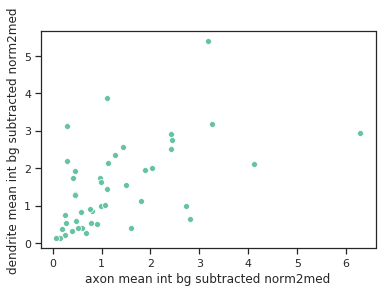

In [30]:

g=sns.scatterplot(x="axon mean int bg subtracted norm2med",
              y="dendrite mean int bg subtracted norm2med",
              data=dfplot)
#plt.xlim([0,5])
#plt.ylim([0,5])

In [58]:
dfplot["condition"].unique()

array(['12hr', '12hr + Bic', 'Unblocked Control'], dtype=object)

## nice plot - norm2meds 12hr dmso

no cells: 19


<Figure size 432x288 with 0 Axes>

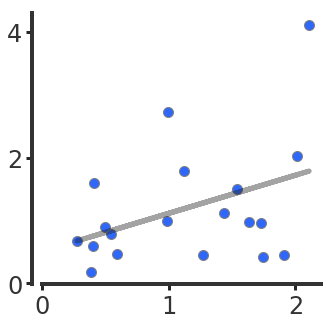

In [59]:
df2plot=dfplot[dfplot["condition"]=="12hr"]
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("ticks")
sns.despine()
sns.set_palette("Set2")

#y="intensity normd 0 to 1"
var="mean tnr"
#y="intensity raw"
#y="raw intensity normd to dio mean"
fig=plt.figure(figsize=(5,5))
#order=['2hrs','4hrs','12hrs','No Blocking']
#palette ={"No Blocking":"gray","2hrs":"magenta","4hrs":"magenta","12hrs":"magenta"}


g=sns.scatterplot(x="dendrite mean int bg subtracted norm2med",
              y="axon mean int bg subtracted norm2med",
                data=df2plot,s=100,color="#2F67F8",linewidth=1,edgecolor='grey')

'''g=sns.barplot(x="mean vglut int in bin overall",y="mean tnr",
                data=dfmeans,alpha=0.3,ci=None,color="#2F67F8")'''



'''plt.errorbar(x = dfmeans["mean vglut int in bin overall"].unique()
,
             y=[dfmeans[dfmeans["bin number"]==0][var].mean(),
                dfmeans[dfmeans["bin number"]==1][var].mean(),
                dfmeans[dfmeans["bin number"]==2][var].mean(),
                dfmeans[dfmeans["bin number"]==3][var].mean(),
                dfmeans[dfmeans["bin number"]==4][var].mean()],
             yerr=[dfmeans[dfmeans["bin number"]==0][var].sem(),
                   dfmeans[dfmeans["bin number"]==1][var].sem(),
                   dfmeans[dfmeans["bin number"]==2][var].sem(),
                   dfmeans[dfmeans["bin number"]==3][var].sem(),
                   dfmeans[dfmeans["bin number"]==4][var].sem()],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,capthick=3,alpha=.7,)

plt.errorbar(x = dfmeans["mean vglut int in bin overall"].unique()
,
             y=[dfmeans[dfmeans["bin number"]==0][var].mean(),
                dfmeans[dfmeans["bin number"]==1][var].mean(),
                dfmeans[dfmeans["bin number"]==2][var].mean(),
                dfmeans[dfmeans["bin number"]==3][var].mean(),
                dfmeans[dfmeans["bin number"]==4][var].mean()],
             yerr=None,
             xerr=[.14,.14,.14,.14,.14],ecolor='black',fmt='none',capsize=0,linewidth=3,capthick=3,alpha=.7,)'''



#plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

g.grid(False)
#plt.ylim([0,4])
#plt.xlim([0,2.5])



x=df2plot["dendrite mean int bg subtracted norm2med"]
y=df2plot["axon mean int bg subtracted norm2med"]
m,b = np.polyfit(x, y, 1) 

plt.plot( x, m*x+b, 'k',alpha=.4,linewidth=5) 

#plt.xticks(dfmeans["mean vglut int in bin overall"].unique(),size=18)

g.xaxis.set_tick_params(width=3)
g.yaxis.set_tick_params(width=3)

#plt.axhline(dfmeans[dfmeans["bin number"]==0][var].mean(),xmin=0.057,xmax=0.17, color='black',alpha=.7,linewidth=3)
#plt.axhline(dfmeans[dfmeans["bin number"]==1][var].mean(),xmin=0.15,xmax=0.3, color='black',alpha=.7,linewidth=3)
#plt.axhline(dfmeans[dfmeans["bin number"]==2][var].mean(),xmin=0.26,xmax=0.41, color='black',alpha=.7,linewidth=3)
#plt.axhline(dfmeans[dfmeans["bin number"]==3][var].mean(),xmin=0.42,xmax=0.59, color='black',alpha=.7,linewidth=3)
#plt.axhline(dfmeans[dfmeans["bin number"]==4][var].mean(),xmin=0.8,xmax=0.97, color='black',alpha=.7,linewidth=3)




for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)


offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":True,"right":False}
sns.despine(ax=g,right=True,top=True,bottom=False,trim=False,offset=offsets)


#g.set_ylabel('TNR Normalised\nFluorescence intensity',
#             size=24,weight ='bold',labelpad=20,color='#333333')
#g.set_xlabel('vglut1 Normalised\nFluorescence intensity',
#             size=24,weight ='bold',labelpad=20,color='#333333')
g.set_ylabel('')
g.set_xlabel('')
plt.yticks([0,2,4],color='#333333',size=24)
plt.xticks([0,1,2],color='#333333',size=24)




diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'supp_axon_dendrite_ratio_12hrdmso.svg', bbox_inches='tight', format='svg')
print('no cells: '+str(len(df2plot)))

In [60]:
from pydoc import help
from scipy.stats.stats import pearsonr
[pearson, pval]=pearsonr(x,y)
print(str(pearson**2))
print(pval)
print(pearson)
print('slope = '+str(m))

0.15699607005776328
0.09307124200909449
0.3962272959524158
slope = 0.6068216540318211


## nice plot - bic

<Figure size 432x288 with 0 Axes>

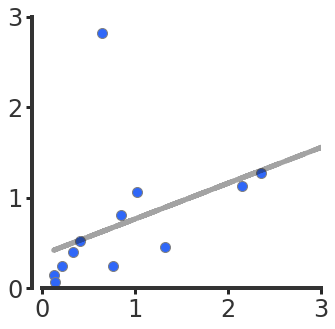

In [61]:
df2plot=dfplot[dfplot["condition"]=="12hr + Bic"]
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("ticks")
sns.despine()
sns.set_palette("Set2")

#y="intensity normd 0 to 1"
var="mean tnr"
#y="intensity raw"
#y="raw intensity normd to dio mean"
fig=plt.figure(figsize=(5,5))
#order=['2hrs','4hrs','12hrs','No Blocking']
#palette ={"No Blocking":"gray","2hrs":"magenta","4hrs":"magenta","12hrs":"magenta"}


g=sns.scatterplot(x="dendrite mean int bg subtracted norm2med",
              y="axon mean int bg subtracted norm2med",
                data=df2plot,s=100,color="#2F67F8",linewidth=1,edgecolor='grey')

'''g=sns.barplot(x="mean vglut int in bin overall",y="mean tnr",
                data=dfmeans,alpha=0.3,ci=None,color="#2F67F8")'''



'''plt.errorbar(x = dfmeans["mean vglut int in bin overall"].unique()
,
             y=[dfmeans[dfmeans["bin number"]==0][var].mean(),
                dfmeans[dfmeans["bin number"]==1][var].mean(),
                dfmeans[dfmeans["bin number"]==2][var].mean(),
                dfmeans[dfmeans["bin number"]==3][var].mean(),
                dfmeans[dfmeans["bin number"]==4][var].mean()],
             yerr=[dfmeans[dfmeans["bin number"]==0][var].sem(),
                   dfmeans[dfmeans["bin number"]==1][var].sem(),
                   dfmeans[dfmeans["bin number"]==2][var].sem(),
                   dfmeans[dfmeans["bin number"]==3][var].sem(),
                   dfmeans[dfmeans["bin number"]==4][var].sem()],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,capthick=3,alpha=.7,)

plt.errorbar(x = dfmeans["mean vglut int in bin overall"].unique()
,
             y=[dfmeans[dfmeans["bin number"]==0][var].mean(),
                dfmeans[dfmeans["bin number"]==1][var].mean(),
                dfmeans[dfmeans["bin number"]==2][var].mean(),
                dfmeans[dfmeans["bin number"]==3][var].mean(),
                dfmeans[dfmeans["bin number"]==4][var].mean()],
             yerr=None,
             xerr=[.14,.14,.14,.14,.14],ecolor='black',fmt='none',capsize=0,linewidth=3,capthick=3,alpha=.7,)'''



#plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

g.grid(False)
plt.ylim([0,3])
plt.xlim([0,3])



x=df2plot["dendrite mean int bg subtracted norm2med"]
y=df2plot["axon mean int bg subtracted norm2med"]
m,b = np.polyfit(x, y, 1) 

plt.plot( x, m*x+b, 'k',linestyle='dashed',alpha=.4,linewidth=5) 

#plt.xticks(dfmeans["mean vglut int in bin overall"].unique(),size=18)

g.xaxis.set_tick_params(width=3)
g.yaxis.set_tick_params(width=3)

#plt.axhline(dfmeans[dfmeans["bin number"]==0][var].mean(),xmin=0.057,xmax=0.17, color='black',alpha=.7,linewidth=3)
#plt.axhline(dfmeans[dfmeans["bin number"]==1][var].mean(),xmin=0.15,xmax=0.3, color='black',alpha=.7,linewidth=3)
#plt.axhline(dfmeans[dfmeans["bin number"]==2][var].mean(),xmin=0.26,xmax=0.41, color='black',alpha=.7,linewidth=3)
#plt.axhline(dfmeans[dfmeans["bin number"]==3][var].mean(),xmin=0.42,xmax=0.59, color='black',alpha=.7,linewidth=3)
#plt.axhline(dfmeans[dfmeans["bin number"]==4][var].mean(),xmin=0.8,xmax=0.97, color='black',alpha=.7,linewidth=3)




for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)


offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":True,"right":False}
sns.despine(ax=g,right=True,top=True,bottom=False,trim=False,offset=offsets)


#g.set_ylabel('TNR Normalised\nFluorescence intensity',
#             size=24,weight ='bold',labelpad=20,color='#333333')
#g.set_xlabel('vglut1 Normalised\nFluorescence intensity',
#             size=24,weight ='bold',labelpad=20,color='#333333')
g.set_ylabel('')
g.set_xlabel('')
plt.yticks([0,1,2,3],color='#333333',size=24)
plt.xticks([0,1,2,3],color='#333333',size=24)




diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'supp_axon_dendrite_ratio_12hrbic.svg', bbox_inches='tight', format='svg')

In [62]:
from pydoc import help
from scipy.stats.stats import pearsonr
[pearson, pval]=pearsonr(x,y)
print(str(pearson**2))
print(pval)
print(pearson)
print('slope = '+str(m))

0.36526708195993945
0.02206308266306064
0.6043732968620796
slope = 0.3945590495364877


## nice plot norm2med - unblocked

no cells: 13


<Figure size 432x288 with 0 Axes>

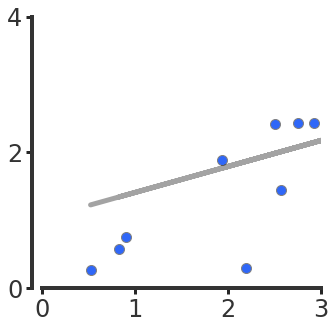

In [67]:
df2plot=dfplot[dfplot["condition"]=="Unblocked Control"]
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("ticks")
sns.despine()
sns.set_palette("Set2")

#y="intensity normd 0 to 1"
var="mean tnr"
#y="intensity raw"
#y="raw intensity normd to dio mean"
fig=plt.figure(figsize=(5,5))
#order=['2hrs','4hrs','12hrs','No Blocking']
#palette ={"No Blocking":"gray","2hrs":"magenta","4hrs":"magenta","12hrs":"magenta"}


g=sns.scatterplot(x="dendrite mean int bg subtracted norm2med",
              y="axon mean int bg subtracted norm2med",
                data=df2plot,s=100,color="#2F67F8",linewidth=1,edgecolor='grey')

'''g=sns.barplot(x="mean vglut int in bin overall",y="mean tnr",
                data=dfmeans,alpha=0.3,ci=None,color="#2F67F8")'''



'''plt.errorbar(x = dfmeans["mean vglut int in bin overall"].unique()
,
             y=[dfmeans[dfmeans["bin number"]==0][var].mean(),
                dfmeans[dfmeans["bin number"]==1][var].mean(),
                dfmeans[dfmeans["bin number"]==2][var].mean(),
                dfmeans[dfmeans["bin number"]==3][var].mean(),
                dfmeans[dfmeans["bin number"]==4][var].mean()],
             yerr=[dfmeans[dfmeans["bin number"]==0][var].sem(),
                   dfmeans[dfmeans["bin number"]==1][var].sem(),
                   dfmeans[dfmeans["bin number"]==2][var].sem(),
                   dfmeans[dfmeans["bin number"]==3][var].sem(),
                   dfmeans[dfmeans["bin number"]==4][var].sem()],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,capthick=3,alpha=.7,)

plt.errorbar(x = dfmeans["mean vglut int in bin overall"].unique()
,
             y=[dfmeans[dfmeans["bin number"]==0][var].mean(),
                dfmeans[dfmeans["bin number"]==1][var].mean(),
                dfmeans[dfmeans["bin number"]==2][var].mean(),
                dfmeans[dfmeans["bin number"]==3][var].mean(),
                dfmeans[dfmeans["bin number"]==4][var].mean()],
             yerr=None,
             xerr=[.14,.14,.14,.14,.14],ecolor='black',fmt='none',capsize=0,linewidth=3,capthick=3,alpha=.7,)'''



#plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

g.grid(False)
plt.ylim([0,4])
plt.xlim([0,3])



xee=df2plot["dendrite mean int bg subtracted norm2med"]
yee=df2plot["axon mean int bg subtracted norm2med"]
m,b = np.polyfit(xee, yee, 1) 

plt.plot( xee, m*xee+b, 'k',alpha=.4,linewidth=5) 

#plt.xticks(dfmeans["mean vglut int in bin overall"].unique(),size=18)

g.xaxis.set_tick_params(width=3)
g.yaxis.set_tick_params(width=3)

#plt.axhline(dfmeans[dfmeans["bin number"]==0][var].mean(),xmin=0.057,xmax=0.17, color='black',alpha=.7,linewidth=3)
#plt.axhline(dfmeans[dfmeans["bin number"]==1][var].mean(),xmin=0.15,xmax=0.3, color='black',alpha=.7,linewidth=3)
#plt.axhline(dfmeans[dfmeans["bin number"]==2][var].mean(),xmin=0.26,xmax=0.41, color='black',alpha=.7,linewidth=3)
#plt.axhline(dfmeans[dfmeans["bin number"]==3][var].mean(),xmin=0.42,xmax=0.59, color='black',alpha=.7,linewidth=3)
#plt.axhline(dfmeans[dfmeans["bin number"]==4][var].mean(),xmin=0.8,xmax=0.97, color='black',alpha=.7,linewidth=3)




for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)


offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":True,"right":False}
sns.despine(ax=g,right=True,top=True,bottom=False,trim=False,offset=offsets)


#g.set_ylabel('TNR Normalised\nFluorescence intensity',
#             size=24,weight ='bold',labelpad=20,color='#333333')
#g.set_xlabel('vglut1 Normalised\nFluorescence intensity',
#             size=24,weight ='bold',labelpad=20,color='#333333')
g.set_ylabel('')
g.set_xlabel('')
plt.yticks([0,2,4],color='#333333',size=24)
plt.xticks([0,1,2,3],color='#333333',size=24)




diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'supp_axon_dendrite_ratio_unblocked.svg', bbox_inches='tight', format='svg')
print('no cells: '+str(len(df2plot)))

In [69]:
from pydoc import help
from scipy.stats.stats import pearsonr
[pearson, pval]=pearsonr(xee,yee)
print(str(pearson**2))
print(pval)
print(pearson)
print('slope = '+str(m))

0.4261186460180455
0.015574399571821891
0.6527776390303558
slope = 0.38269528416809884
